In [1]:
import os
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import tensorflow as tf
%matplotlib inline 


In [2]:
import logging
FORMAT = '%(asctime)-15s %(levelname)s %(name)s : %(message)s'
logging.basicConfig(level=logging.DEBUG, format=FORMAT, stream=sys.stdout )
logging.debug("Logging enabled")

2018-11-07 11:04:21,456 DEBUG root : Logging enabled


In [17]:
import os
import sys
ROOT_DIR = os.path.abspath("../../../")
sys.path.append(ROOT_DIR)
HUMAN_DIR = os.path.abspath("../")
sys.path.append(HUMAN_DIR)
MODEL_DIR = os.path.abspath(os.path.join(ROOT_DIR, "../Models"))
DATA_DIR  = os.path.abspath(os.path.join(ROOT_DIR, "../Data"))
COCO_DIR  = os.path.abspath(os.path.join(DATA_DIR, "coco"))
OCCLUDE_DIR  = os.path.abspath(os.path.join(DATA_DIR, "VOCdevkit/VOC2012"))
import humans
import abstract_data
import mrcnn.model as model
import mrcnn.utils as utils

In [18]:
logging.debug("Begin load of coco data")
coco_data = humans.load_data(data_type="COCO", dataset=COCO_DIR,subset="minival", occlude_data_path=OCCLUDE_DIR, max_occlusion_objects = 10, year=2014)
logging.debug("End load of coco data")

2018-11-07 11:17:31,014 DEBUG root : Begin load of coco data
2018-11-07 11:17:31,016 DEBUG root : Loading data of type COCOm=, subset minival from location /data/AI/Data/coco
loading annotations into memory...
Done (t=0.70s)
creating index...
Data set type is instances
index created!
No coco data exists at /data/AI/Data/coco/annotations/panoptic_minival2014.json
2018-11-07 11:17:31,722 DEBUG root : Adding occlusions to the data
2018-11-07 11:17:31,723 DEBUG root : Loading occlusion data from /data/AI/Data/VOCdevkit/VOC2012
2018-11-07 11:17:38,233 DEBUG root : 11 Occluders loaded
2018-11-07 11:17:38,234 DEBUG root : End load of coco data


In [19]:
logging.debug("Begin setup dataset")
dataset = humans.DensePoseDataSet(coco_data)
dataset.load_prepare()
logging.debug("End setup dataset [image count %s]", len(dataset.image_info))

2018-11-07 11:17:38,244 DEBUG root : Begin setup dataset
2018-11-07 11:17:42,540 DEBUG root : Adding occlusion information to images
2018-11-07 11:17:42,649 DEBUG root : Added occlusion information to images
2018-11-07 11:17:42,656 DEBUG root : End setup dataset [image count 1508]


In [20]:
config = humans.HumanConfig()
data_generator = model.DataGenerator(dataset, config, batch_size=1)
logging.debug("Created data generator with %s elements", data_generator.__len__())

2018-11-07 11:17:42,663 DEBUG root : Creating data sequencer batch size 1
2018-11-07 11:17:42,743 DEBUG root : Created data generator with 1508 elements


2018-11-07 12:11:53,609 DEBUG root : Getting first element
2018-11-07 12:11:53,797 DEBUG root : Max min 2 versus 2
2018-11-07 12:11:53,803 DEBUG root : Max min 2 versus 2
2018-11-07 12:11:53,808 DEBUG root : Max min 2 versus 2
2018-11-07 12:11:53,809 DEBUG root : Max min (2, 0) versus (2, 0)
2018-11-07 12:11:53,860 DEBUG root : Got first element


2018-11-07 12:11:53,927 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:11:53,969 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:11:53,998 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:11:54,021 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:11:54,058 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:11:54,075 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:11:54,109 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:11:54,130 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:11:54,146 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:11:54,173 DEBUG matplotlib.axes._base : update_title_pos


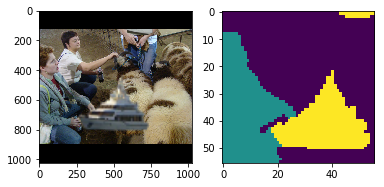

In [40]:
logging.debug("Getting first element")
index = 0
image_index = index * data_generator.batch_size
inputs, outputs = data_generator.__getitem__(index)
batch_images, batch_image_meta, batch_rpn_match, batch_rpn_bbox, batch_gt_class_ids, batch_gt_boxes, batch_gt_mask = inputs
logging.debug("Got first element")
#good_batch_gt_masks = np.transpose(good_batch_gt_masks,(0,2,3,1))
dg_image = np.round(batch_images[0,:,:] + config.MEAN_PIXEL).astype('uint8')
plt.subplot(1, 2, 1)
plt.imshow(dg_image)
plt.subplot(1, 2, 2)
plt.imshow(batch_gt_mask[0,:,:,0])


2018-11-07 12:15:22,740 DEBUG root : Max min 2 versus 2
2018-11-07 12:15:22,745 DEBUG root : Max min 2 versus 2
2018-11-07 12:15:22,750 DEBUG root : Max min 2 versus 2
2018-11-07 12:15:22,751 DEBUG root : Max min (2, 0) versus (2, 0)


2018-11-07 12:15:22,802 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:15:22,836 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:15:22,863 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:15:22,885 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:15:22,921 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:15:22,939 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:15:22,970 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:15:22,987 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:15:23,001 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 12:15:23,027 DEBUG matplotlib.axes._base : update_title_pos


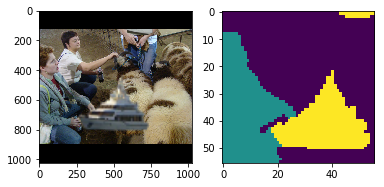

In [45]:
image_id = data_generator.image_ids[image_index]
image = dataset.image_set.images[image_id]
ds_image, image_meta, gt_class_ids, gt_boxes, gt_masks = \
    model.load_image_gt(dataset, config, image_id, augment=None,
                                              augmentation=None,
                                              use_mini_mask=True)
plt.subplot(1, 2, 1)
plt.imshow(ds_image)
plt.subplot(1, 2, 2)
plt.imshow(gt_masks[:,:,0])


In [42]:
image, image_meta, gt_class_ids, gt_boxes, gt_masks = \
    model.load_image_gt(dataset, config, image_id, augment=None,
                                              augmentation=None,
                                              use_mini_mask=False)
ds_image = dataset.load_image(image_id)
ds_mask, ds_class_ids = dataset.load_mask(image_id)

2018-11-07 11:04:32,077 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,111 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,158 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,181 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,195 DEBUG matplotlib.axes._base : update_title_pos


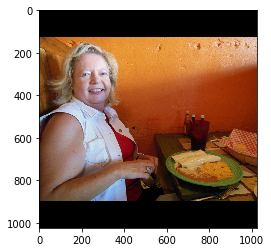

In [10]:
image = np.round(batch_images[0,:,:] + config.MEAN_PIXEL).astype('uint8')
plt.imshow(image)

2018-11-07 11:04:32,318 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,348 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,400 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,424 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,437 DEBUG matplotlib.axes._base : update_title_pos


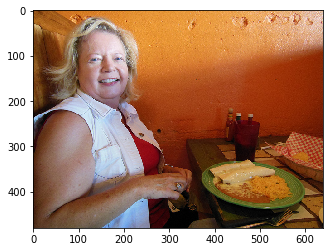

In [11]:
plt.imshow(ds_image)

uint8
(1, 56, 56, 100)
1


2018-11-07 11:04:32,521 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,553 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,584 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,606 DEBUG matplotlib.axes._base : update_title_pos
2018-11-07 11:04:32,620 DEBUG matplotlib.axes._base : update_title_pos


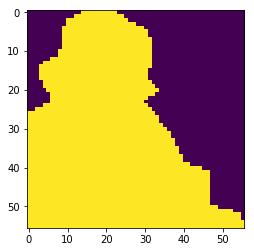

In [12]:
mask = np.round(batch_gt_mask[0,:,:,0])
print(batch_gt_mask.dtype)
print(batch_gt_mask.shape)
print(np.max(batch_gt_mask))
plt.imshow(mask)

In [13]:
model.__file__

'/data/AI/Mask_RCNN/mrcnn/model.py'